In [1]:
import sqlite3
import pandas as pd
import numpy as np

In [2]:
con = sqlite3.connect("database.sqlite")
data_country = pd.read_sql_query("SELECT * from Country", con)
data_league = pd.read_sql_query("SELECT * from League", con)
data_match = pd.read_sql_query("SELECT * from Match", con)
data_player = pd.read_sql_query("SELECT * from Player", con)
data_player_att = pd.read_sql_query("SELECT * from Player_Attributes", con)
data_team = pd.read_sql_query("SELECT * from Team", con)
data_team_att = pd.read_sql_query("SELECT * from Team_Attributes", con)

# EARLY EXPLORATION
### NOTES
- home_player_1 is the id of one of the players
- The last few variables (betting sites, the names are abbreviations) follow the convention:
    - ___H = ___ home win odds
    - ___D = ___ draw win odds
    - ___A = ___ away win odds
    - where ___ is a betting platform
- (home_player_X1, home_player_Y1) is the coordinate of player 1's position from the home team

In [3]:
# Print out names of all cols
count = 0
for colname in data_match.columns:
    count +=1
    print(colname)

id
country_id
league_id
season
stage
date
match_api_id
home_team_api_id
away_team_api_id
home_team_goal
away_team_goal
home_player_X1
home_player_X2
home_player_X3
home_player_X4
home_player_X5
home_player_X6
home_player_X7
home_player_X8
home_player_X9
home_player_X10
home_player_X11
away_player_X1
away_player_X2
away_player_X3
away_player_X4
away_player_X5
away_player_X6
away_player_X7
away_player_X8
away_player_X9
away_player_X10
away_player_X11
home_player_Y1
home_player_Y2
home_player_Y3
home_player_Y4
home_player_Y5
home_player_Y6
home_player_Y7
home_player_Y8
home_player_Y9
home_player_Y10
home_player_Y11
away_player_Y1
away_player_Y2
away_player_Y3
away_player_Y4
away_player_Y5
away_player_Y6
away_player_Y7
away_player_Y8
away_player_Y9
away_player_Y10
away_player_Y11
home_player_1
home_player_2
home_player_3
home_player_4
home_player_5
home_player_6
home_player_7
home_player_8
home_player_9
home_player_10
home_player_11
away_player_1
away_player_2
away_player_3
away_player_4
a

In [4]:
# View xtml attributes
print(data_match['corner'].dropna())

1728     <corner><value><stats><corners>1</corners></st...
1729     <corner><value><stats><corners>1</corners></st...
1730     <corner><value><stats><corners>1</corners></st...
1731     <corner><value><stats><corners>1</corners></st...
1732     <corner><value><stats><corners>1</corners></st...
                               ...                        
25944                                           <corner />
25945                                           <corner />
25946                                           <corner />
25947                                           <corner />
25948                                           <corner />
Name: corner, Length: 14217, dtype: object


In [36]:
# Start by dropping all the stuff in xtml form
match = data_match.drop(['goal', 'shoton', 'shotoff', 'foulcommit', 'card', 'cross', 'corner', 'possession'], axis = 1)
match

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,...,SJA,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA
0,1,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,...,4.00,1.65,3.40,4.50,1.78,3.25,4.00,1.73,3.40,4.20
1,2,1,1,2008/2009,1,2008-08-16 00:00:00,492474,10000,9994,0,...,3.80,2.00,3.25,3.25,1.85,3.25,3.75,1.91,3.25,3.60
2,3,1,1,2008/2009,1,2008-08-16 00:00:00,492475,9984,8635,0,...,2.50,2.35,3.25,2.65,2.50,3.20,2.50,2.30,3.20,2.75
3,4,1,1,2008/2009,1,2008-08-17 00:00:00,492476,9991,9998,5,...,7.50,1.45,3.75,6.50,1.50,3.75,5.50,1.44,3.75,6.50
4,5,1,1,2008/2009,1,2008-08-16 00:00:00,492477,7947,9985,1,...,1.73,4.50,3.40,1.65,4.50,3.50,1.65,4.75,3.30,1.67
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25974,25975,24558,24558,2015/2016,9,2015-09-22 00:00:00,1992091,10190,10191,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25975,25976,24558,24558,2015/2016,9,2015-09-23 00:00:00,1992092,9824,10199,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25976,25977,24558,24558,2015/2016,9,2015-09-23 00:00:00,1992093,9956,10179,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25977,25978,24558,24558,2015/2016,9,2015-09-22 00:00:00,1992094,7896,10243,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
# Make dummy variables for win loss and draw
match['home_win'] = np.where((match['home_team_goal'] > match['away_team_goal']), 1, 0)
match['away_win'] = np.where((match['home_team_goal'] < match['away_team_goal']), 1, 0)
match['draw'] = np.where((match['home_team_goal'] == match['away_team_goal']), 1, 0)

match[['home_team_goal', 'away_team_goal', 'home_win', 'away_win', 'draw']]

,home_team_goal,away_team_goal,home_win,away_win,draw
0,1,1,0,0,1
1,0,0,0,0,1
2,0,3,0,1,0
3,5,0,1,0,0
4,1,3,0,1,0
...,...,...,...,...,...
25974,1,0,1,0,0
25975,1,2,0,1,0
25976,2,0,1,0,0
25977,0,0,0,0,1


# VISUALIZE MATCH DATASET

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

C:\Users\emile\AppData\Local\Temp\ipykernel_23592\2197177453.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  match_betting[['home_win', 'away_win', 'draw']] = match[['home_win', 'away_win', 'draw']]
C:\Users\emile\AppData\Local\Temp\ipykernel_23592\2197177453.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  match_betting[['home_win', 'away_win', 'draw']] = match[['home_win', 'away_win', 'draw']]
C:\Users\emile\AppData\Local\Temp\ipykernel_23592\2197177453.py:7: SettingWithCopyWarning: 
A value is try

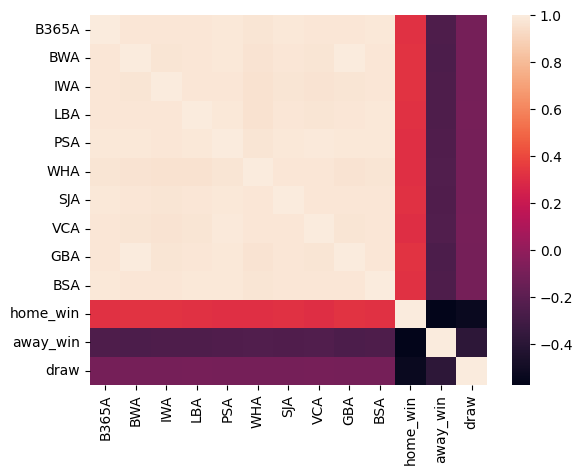

C:\Users\emile\AppData\Local\Temp\ipykernel_23592\2197177453.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  match_betting[['home_win', 'away_win', 'draw']] = match[['home_win', 'away_win', 'draw']]
C:\Users\emile\AppData\Local\Temp\ipykernel_23592\2197177453.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  match_betting[['home_win', 'away_win', 'draw']] = match[['home_win', 'away_win', 'draw']]
C:\Users\emile\AppData\Local\Temp\ipykernel_23592\2197177453.py:17: SettingWithCopyWarning: 
A value is 

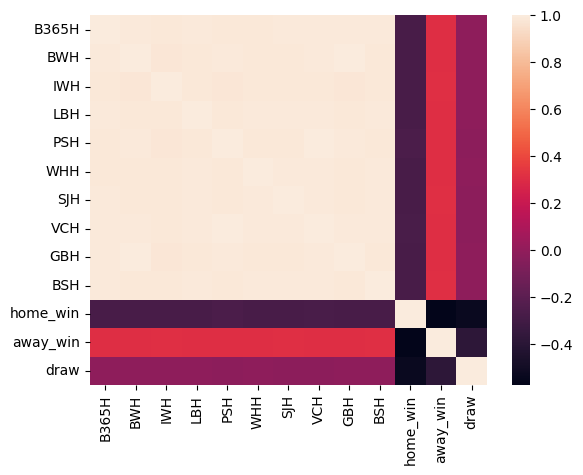

C:\Users\emile\AppData\Local\Temp\ipykernel_23592\2197177453.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  match_betting[['home_win', 'away_win', 'draw']] = match[['home_win', 'away_win', 'draw']]
C:\Users\emile\AppData\Local\Temp\ipykernel_23592\2197177453.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  match_betting[['home_win', 'away_win', 'draw']] = match[['home_win', 'away_win', 'draw']]
C:\Users\emile\AppData\Local\Temp\ipykernel_23592\2197177453.py:27: SettingWithCopyWarning: 
A value is 

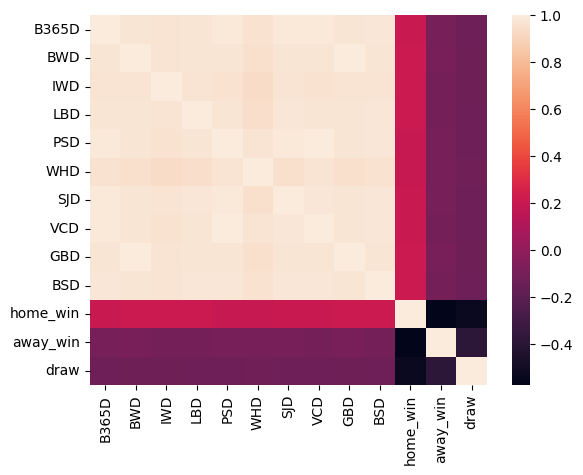

In [8]:
# Heatmap of all betting 

# Away odds
columns = match.columns.tolist()
selected_columns = [col for col in columns if col.endswith("A")]
match_betting = match[selected_columns]
match_betting[['home_win', 'away_win', 'draw']] = match[['home_win', 'away_win', 'draw']]
match_betting = match_betting.dropna()

ax = sns.heatmap(match_betting.corr())
plt.show()

# home odds
columns = match.columns.tolist()
selected_columns = [col for col in columns if col.endswith("H")]
match_betting = match[selected_columns]
match_betting[['home_win', 'away_win', 'draw']] = match[['home_win', 'away_win', 'draw']]
match_betting = match_betting.dropna()

ax = sns.heatmap(match_betting.corr())
plt.show()

# draw odds
columns = match.columns.tolist()
selected_columns = [col for col in columns if col.endswith("D")]
match_betting = match[selected_columns]
match_betting[['home_win', 'away_win', 'draw']] = match[['home_win', 'away_win', 'draw']]
match_betting = match_betting.dropna()

ax = sns.heatmap(match_betting.corr())
plt.show()

# CREATE NEW FEATURES WITH TEAM DATA

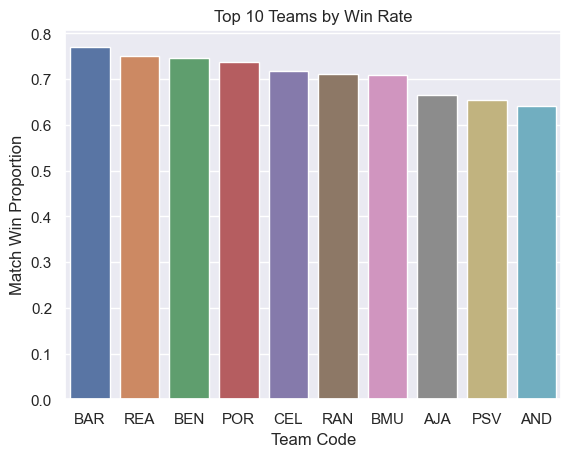

In [9]:
# Individual Team Success Factors
data_team['matches_played'] = np.zeros(299, dtype=int)
data_team['wins'] = np.zeros(299, dtype=int)
data_team['win_rate'] = np.zeros(299, dtype=float)
all_teams = data_team['team_api_id'].unique() # List of all team IDs

# Set number of wins and total matches played for each team
for t in all_teams:
    t_data = match.loc[data_match['home_team_api_id'] == t]
    total_matches = len(t_data)
    win_data = t_data.loc[t_data['home_team_goal'] > t_data['away_team_goal']]
    total_wins = len(win_data)
    t_data = match.loc[data_match['away_team_api_id'] == t]
    total_matches += len(t_data)
    win_data = t_data.loc[t_data['away_team_goal'] > t_data['home_team_goal']]
    total_wins += len(win_data)
    data_team.loc[data_team['team_api_id'] == t, 'matches_played'] = total_matches
    data_team.loc[data_team['team_api_id'] == t, 'wins'] = total_wins
    data_team.loc[data_team['team_api_id'] == t, 'win_rate'] = total_wins / total_matches
    
# Show top teams with win rate
data_team.sort_values(by=['win_rate'], ascending=False, inplace=True)
sns.set_theme(style="darkgrid")
sns.barplot(x=data_team.head(10)['team_short_name'], y=data_team.head(10)['win_rate'])
plt.title('Top 10 Teams by Win Rate')
plt.ylabel('Match Win Proportion', fontsize=12)
plt.xlabel('Team Code', fontsize=12)
plt.show()

In [ ]:
data_team['buildUpPlaySpeed'] = np.zeros(299, dtype=float)
data_team['buildUpPlayDribbling'] = np.zeros(299, dtype=float)
data_team['buildUpPlayPassing'] = np.zeros(299, dtype=float)
data_team['chanceCreationPassing'] = np.zeros(299, dtype=float)
data_team['chanceCreationCrossing'] = np.zeros(299, dtype=float)
data_team['chanceCreationShooting'] = np.zeros(299, dtype=float)
data_team['defencePressure'] = np.zeros(299, dtype=float)
data_team['defenceAggression'] = np.zeros(299, dtype=float)
data_team['defenceTeamWidth'] = np.zeros(299, dtype=float)
data_team['avg_rating'] = np.zeros(299, dtype=float)

# Set average metrics for each team
for t in all_teams:
    t_data = data_team_att.loc[data_team_att['team_api_id'] == t]
    data_team.loc[data_team['team_api_id'] == t, 'buildUpPlaySpeed'] = t_data['buildUpPlaySpeed'].mean()
    data_team.loc[data_team['team_api_id'] == t, 'buildUpPlayDribbling'] = t_data['buildUpPlayDribbling'].mean()
    data_team.loc[data_team['team_api_id'] == t, 'buildUpPlayPassing'] = t_data['buildUpPlayPassing'].mean()
    data_team.loc[data_team['team_api_id'] == t, 'chanceCreationPassing'] = t_data['chanceCreationPassing'].mean()
    data_team.loc[data_team['team_api_id'] == t, 'chanceCreationCrossing'] = t_data['chanceCreationCrossing'].mean()
    data_team.loc[data_team['team_api_id'] == t, 'chanceCreationShooting'] = t_data['chanceCreationShooting'].mean()
    data_team.loc[data_team['team_api_id'] == t, 'defencePressure'] = t_data['defencePressure'].mean()
    data_team.loc[data_team['team_api_id'] == t, 'defenceAggression'] = t_data['defenceAggression'].mean()
    data_team.loc[data_team['team_api_id'] == t, 'defenceTeamWidth'] = t_data['defenceTeamWidth'].mean()

In [ ]:
# WARNING: This cell takes a long time to run
# Average player rating for each team (weighted such that each player is counted once for each match played)
for t in all_teams:
    rating_sum = 0
    rating_count = 0
    for pos in ['home', 'away']:
        data = match.loc[match[pos+'_team_api_id'] == t]
        for i in range(1,12):
            player_ids = data[pos+'_player_'+str(i)] # Player i for all times when t played home/away
            for p in player_ids:
                if np.isnan(p):
                    continue
                rating_sum += data_player_att.loc[data_player_att['player_api_id'] == p, 'overall_rating'].iloc[0]
                rating_count += 1
    data_team.loc[data_team['team_api_id'] == t, 'avg_rating'] = rating_sum / rating_count

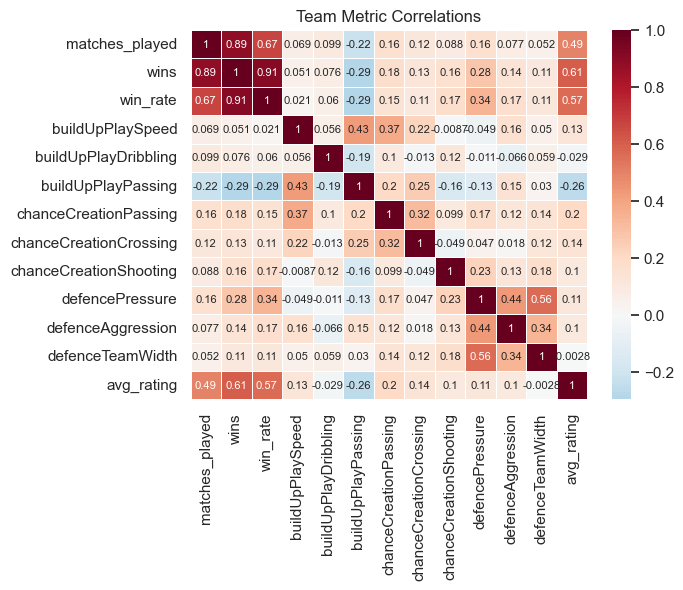

In [84]:
correlations = data_team[['matches_played', 'wins', 'win_rate', 'buildUpPlaySpeed', 'buildUpPlayDribbling',
                          'buildUpPlayPassing', 'chanceCreationPassing', 'chanceCreationCrossing', 'chanceCreationShooting',
                          'defencePressure', 'defenceAggression', 'defenceTeamWidth', 'avg_rating']].corr(method='pearson')
sns.heatmap(data=correlations,xticklabels=correlations.columns,yticklabels=correlations.columns,cmap='RdBu_r',annot=True,
            linewidth=0.5,center=0,annot_kws={'fontsize':8})
plt.title('Team Metric Correlations')
plt.show()

**Conclusions from Last Heatmap:** Most team strategy metrics don't have much impact on win rate (though building up play by passing seems to have a somewhat significant negative correlation and defensive pressure seems to have a somewhat significant positive correlation). Number of matches played and average team rating, however, are reasonably highly correlated with win rate which could be useful in predicting future outcomes.

# QUICK LOOK AT OTHER DATA

In [11]:
data_country

,id,name
0,1,Belgium
1,1729,England
2,4769,France
3,7809,Germany
4,10257,Italy
5,13274,Netherlands
6,15722,Poland
7,17642,Portugal
8,19694,Scotland
9,21518,Spain


In [12]:
data_league

,id,country_id,name
0,1,1,Belgium Jupiler League
1,1729,1729,England Premier League
2,4769,4769,France Ligue 1
3,7809,7809,Germany 1. Bundesliga
4,10257,10257,Italy Serie A
5,13274,13274,Netherlands Eredivisie
6,15722,15722,Poland Ekstraklasa
7,17642,17642,Portugal Liga ZON Sagres
8,19694,19694,Scotland Premier League
9,21518,21518,Spain LIGA BBVA


In [13]:
data_player

,id,player_api_id,player_name,player_fifa_api_id,birthday,height,weight
0,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187
1,2,155782,Aaron Cresswell,189615,1989-12-15 00:00:00,170.18,146
2,3,162549,Aaron Doran,186170,1991-05-13 00:00:00,170.18,163
3,4,30572,Aaron Galindo,140161,1982-05-08 00:00:00,182.88,198
4,5,23780,Aaron Hughes,17725,1979-11-08 00:00:00,182.88,154
...,...,...,...,...,...,...,...
11055,11071,26357,Zoumana Camara,2488,1979-04-03 00:00:00,182.88,168
11056,11072,111182,Zsolt Laczko,164680,1986-12-18 00:00:00,182.88,176
11057,11073,36491,Zsolt Low,111191,1979-04-29 00:00:00,180.34,154
11058,11074,35506,Zurab Khizanishvili,47058,1981-10-06 00:00:00,185.42,172


In [32]:
data_player_att

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,2,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,3,218353,505942,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,49.0,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,4,218353,505942,2015-03-20 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,5,218353,505942,2007-02-22 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183973,183974,102359,39902,2009-08-30 00:00:00,83.0,85.0,right,medium,low,84.0,...,88.0,83.0,22.0,31.0,30.0,9.0,20.0,84.0,20.0,20.0
183974,183975,102359,39902,2009-02-22 00:00:00,78.0,80.0,right,medium,low,74.0,...,88.0,70.0,32.0,31.0,30.0,9.0,20.0,73.0,20.0,20.0
183975,183976,102359,39902,2008-08-30 00:00:00,77.0,80.0,right,medium,low,74.0,...,88.0,70.0,32.0,31.0,30.0,9.0,20.0,73.0,20.0,20.0
183976,183977,102359,39902,2007-08-30 00:00:00,78.0,81.0,right,medium,low,74.0,...,88.0,53.0,28.0,32.0,30.0,9.0,20.0,73.0,20.0,20.0


In [83]:
data_team

,id,team_api_id,team_fifa_api_id,team_long_name,team_short_name,matches_played,wins,win_rate,buildUpPlaySpeed,buildUpPlayDribbling,buildUpPlayPassing,chanceCreationPassing,chanceCreationCrossing,chanceCreationShooting,defencePressure,defenceAggression,defenceTeamWidth,avg_rating
258,43042,8634,241.0,FC Barcelona,BAR,304,234,0.769737,35.833333,35.0,34.000000,45.166667,33.333333,53.000000,64.333333,54.500000,66.500000,83.721119
256,43040,8633,243.0,Real Madrid CF,REA,304,228,0.750000,50.666667,55.5,38.666667,67.500000,53.833333,69.000000,52.000000,52.166667,63.500000,83.448637
216,35294,9772,234.0,SL Benfica,BEN,248,185,0.745968,59.000000,55.0,45.500000,63.833333,59.000000,55.333333,54.333333,51.500000,52.000000,78.087379
205,35283,9773,236.0,FC Porto,POR,248,183,0.737903,51.000000,50.0,48.666667,55.666667,66.833333,66.166667,53.333333,50.333333,55.333333,77.910948
242,39395,9925,78.0,Celtic,CEL,304,218,0.717105,61.333333,50.5,57.333333,55.666667,60.833333,60.833333,53.333333,54.333333,62.166667,71.018574
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180,30222,6631,100626.0,FC Dordrecht,DOR,34,4,0.117647,39.000000,33.0,62.000000,62.000000,66.000000,48.000000,51.000000,58.000000,55.000000,65.311653
104,15627,9912,159.0,DSC Arminia Bielefeld,BIE,34,4,0.117647,49.333333,49.0,59.333333,48.666667,51.333333,48.000000,39.666667,47.333333,49.333333,67.385027
119,18079,8357,165.0,SpVgg Greuther Fürth,GRF,34,4,0.117647,59.833333,60.0,45.666667,50.666667,51.000000,50.833333,46.666667,52.833333,56.666667,70.034759
282,47612,7869,1867.0,Córdoba CF,COR,38,3,0.078947,40.333333,46.5,46.333333,41.666667,59.000000,51.166667,36.833333,38.333333,48.666667,71.248804


In [34]:
data_team_att

,id,team_fifa_api_id,team_api_id,date,buildUpPlaySpeed,buildUpPlaySpeedClass,buildUpPlayDribbling,buildUpPlayDribblingClass,buildUpPlayPassing,buildUpPlayPassingClass,...,chanceCreationShooting,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass
0,1,434,9930,2010-02-22 00:00:00,60,Balanced,NaN,Little,50,Mixed,...,55,Normal,Organised,50,Medium,55,Press,45,Normal,Cover
1,2,434,9930,2014-09-19 00:00:00,52,Balanced,48.0,Normal,56,Mixed,...,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover
2,3,434,9930,2015-09-10 00:00:00,47,Balanced,41.0,Normal,54,Mixed,...,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover
3,4,77,8485,2010-02-22 00:00:00,70,Fast,NaN,Little,70,Long,...,70,Lots,Organised,60,Medium,70,Double,70,Wide,Cover
4,5,77,8485,2011-02-22 00:00:00,47,Balanced,NaN,Little,52,Mixed,...,52,Normal,Organised,47,Medium,47,Press,52,Normal,Cover
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1453,1454,15005,10000,2011-02-22 00:00:00,52,Balanced,NaN,Little,52,Mixed,...,53,Normal,Organised,46,Medium,48,Press,53,Normal,Cover
1454,1455,15005,10000,2012-02-22 00:00:00,54,Balanced,NaN,Little,51,Mixed,...,50,Normal,Organised,44,Medium,55,Press,53,Normal,Cover
1455,1456,15005,10000,2013-09-20 00:00:00,54,Balanced,NaN,Little,51,Mixed,...,32,Little,Organised,44,Medium,58,Press,37,Normal,Cover
1456,1457,15005,10000,2014-09-19 00:00:00,54,Balanced,42.0,Normal,51,Mixed,...,32,Little,Organised,44,Medium,58,Press,37,Normal,Cover


# CREATE INPUT DATASET
- create dataset with only relevant data based on our exploration 


In [85]:
# View all columns
for col in match.columns:
    print(col)

id
country_id
league_id
season
stage
date
match_api_id
home_team_api_id
away_team_api_id
home_team_goal
away_team_goal
home_player_X1
home_player_X2
home_player_X3
home_player_X4
home_player_X5
home_player_X6
home_player_X7
home_player_X8
home_player_X9
home_player_X10
home_player_X11
away_player_X1
away_player_X2
away_player_X3
away_player_X4
away_player_X5
away_player_X6
away_player_X7
away_player_X8
away_player_X9
away_player_X10
away_player_X11
home_player_Y1
home_player_Y2
home_player_Y3
home_player_Y4
home_player_Y5
home_player_Y6
home_player_Y7
home_player_Y8
home_player_Y9
home_player_Y10
home_player_Y11
away_player_Y1
away_player_Y2
away_player_Y3
away_player_Y4
away_player_Y5
away_player_Y6
away_player_Y7
away_player_Y8
away_player_Y9
away_player_Y10
away_player_Y11
home_player_1
home_player_2
home_player_3
home_player_4
home_player_5
home_player_6
home_player_7
home_player_8
home_player_9
home_player_10
home_player_11
away_player_1
away_player_2
away_player_3
away_player_4
a

In [86]:
# Add data about home and away teams to match
data_team_home = data_team.drop(['id', 'team_fifa_api_id', 'team_long_name', 'team_short_name'], axis = 1)
data_team_away = data_team.drop(['id', 'team_fifa_api_id', 'team_long_name', 'team_short_name'], axis = 1)

home_cols = ["home_" + col for col in data_team_home.columns]
data_team_home.columns = home_cols

away_cols = ["away_" + col for col in data_team_away.columns]
data_team_away.columns = away_cols

print(data_team_away.columns)

Index(['away_team_api_id', 'away_matches_played', 'away_wins', 'away_win_rate',
       'away_buildUpPlaySpeed', 'away_buildUpPlayDribbling',
       'away_buildUpPlayPassing', 'away_chanceCreationPassing',
       'away_chanceCreationCrossing', 'away_chanceCreationShooting',
       'away_defencePressure', 'away_defenceAggression',
       'away_defenceTeamWidth', 'away_avg_rating'],
      dtype='object')


In [87]:
# Combine team data with match data
raw_data = pd.merge(match, data_team_home, left_on='home_team_api_id', right_on='home_team_api_id')
raw_data = pd.merge(raw_data, data_team_away, left_on='away_team_api_id', right_on='away_team_api_id')
raw_data

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,...,away_buildUpPlaySpeed,away_buildUpPlayDribbling,away_buildUpPlayPassing,away_chanceCreationPassing,away_chanceCreationCrossing,away_chanceCreationShooting,away_defencePressure,away_defenceAggression,away_defenceTeamWidth,away_avg_rating
0,1,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,...,46.0,NaN,41.500000,46.0,53.500000,53.750000,48.250000,49.000000,58.750000,65.744650
1,483,1,1,2009/2010,5,2009-08-30 00:00:00,665353,9987,9993,1,...,46.0,NaN,41.500000,46.0,53.500000,53.750000,48.250000,49.000000,58.750000,65.744650
2,524,1,1,2010/2011,1,2010-08-01 00:00:00,838476,9987,9993,2,...,46.0,NaN,41.500000,46.0,53.500000,53.750000,48.250000,49.000000,58.750000,65.744650
3,759,1,1,2011/2012,1,2011-07-30 00:00:00,1032694,9987,9993,3,...,46.0,NaN,41.500000,46.0,53.500000,53.750000,48.250000,49.000000,58.750000,65.744650
4,1014,1,1,2012/2013,11,2012-10-20 00:00:00,1224064,9987,9993,3,...,46.0,NaN,41.500000,46.0,53.500000,53.750000,48.250000,49.000000,58.750000,65.744650
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25974,25430,24558,24558,2012/2013,8,2012-09-01 00:00:00,1227772,7730,9956,0,...,49.5,60.0,53.166667,53.0,58.666667,50.333333,37.833333,46.666667,51.666667,67.857143
25975,25549,24558,24558,2013/2014,29,2014-04-12 00:00:00,1471923,7730,9956,0,...,49.5,60.0,53.166667,53.0,58.666667,50.333333,37.833333,46.666667,51.666667,67.857143
25976,25591,24558,24558,2013/2014,4,2013-08-03 00:00:00,1471649,7730,9956,0,...,49.5,60.0,53.166667,53.0,58.666667,50.333333,37.833333,46.666667,51.666667,67.857143
25977,25845,24558,24558,2015/2016,18,2015-12-06 00:00:00,1992136,7896,9956,4,...,49.5,60.0,53.166667,53.0,58.666667,50.333333,37.833333,46.666667,51.666667,67.857143


In [88]:
# Look at columns again
for col in raw_data.columns:
    print(col)

id
country_id
league_id
season
stage
date
match_api_id
home_team_api_id
away_team_api_id
home_team_goal
away_team_goal
home_player_X1
home_player_X2
home_player_X3
home_player_X4
home_player_X5
home_player_X6
home_player_X7
home_player_X8
home_player_X9
home_player_X10
home_player_X11
away_player_X1
away_player_X2
away_player_X3
away_player_X4
away_player_X5
away_player_X6
away_player_X7
away_player_X8
away_player_X9
away_player_X10
away_player_X11
home_player_Y1
home_player_Y2
home_player_Y3
home_player_Y4
home_player_Y5
home_player_Y6
home_player_Y7
home_player_Y8
home_player_Y9
home_player_Y10
home_player_Y11
away_player_Y1
away_player_Y2
away_player_Y3
away_player_Y4
away_player_Y5
away_player_Y6
away_player_Y7
away_player_Y8
away_player_Y9
away_player_Y10
away_player_Y11
home_player_1
home_player_2
home_player_3
home_player_4
home_player_5
home_player_6
home_player_7
home_player_8
home_player_9
home_player_10
home_player_11
away_player_1
away_player_2
away_player_3
away_player_4
a

In [89]:
# Remove all irrelevant features
raw_data = raw_data.drop(['id', 'country_id', 'league_id', "season", "stage", "date", "match_api_id", "home_team_api_id", "away_team_api_id"], axis=1)

In [90]:
# Remove player data
home_players = raw_data.filter(regex="home_player_.*").columns
away_players = raw_data.filter(regex="away_player_.*").columns

raw_data.drop(home_players, axis=1, inplace=True)
raw_data.drop(away_players, axis=1, inplace=True)

In [91]:
# Remove data that you wouldn't have when predicting
raw_data.drop(['home_team_goal', 'away_team_goal'], axis=1, inplace=True)
raw_data.columns

Index(['B365H', 'B365D', 'B365A', 'BWH', 'BWD', 'BWA', 'IWH', 'IWD', 'IWA',
       'LBH', 'LBD', 'LBA', 'PSH', 'PSD', 'PSA', 'WHH', 'WHD', 'WHA', 'SJH',
       'SJD', 'SJA', 'VCH', 'VCD', 'VCA', 'GBH', 'GBD', 'GBA', 'BSH', 'BSD',
       'BSA', 'home_matches_played', 'home_wins', 'home_win_rate',
       'home_buildUpPlaySpeed', 'home_buildUpPlayDribbling',
       'home_buildUpPlayPassing', 'home_chanceCreationPassing',
       'home_chanceCreationCrossing', 'home_chanceCreationShooting',
       'home_defencePressure', 'home_defenceAggression',
       'home_defenceTeamWidth', 'home_avg_rating', 'away_matches_played',
       'away_wins', 'away_win_rate', 'away_buildUpPlaySpeed',
       'away_buildUpPlayDribbling', 'away_buildUpPlayPassing',
       'away_chanceCreationPassing', 'away_chanceCreationCrossing',
       'away_chanceCreationShooting', 'away_defencePressure',
       'away_defenceAggression', 'away_defenceTeamWidth', 'away_avg_rating'],
      dtype='object')

In [92]:
# Deal with na's
nan_counts = raw_data.isna().sum(axis=0)
nan_counts = pd.DataFrame({'nan_perc': nan_counts/25979})

print(nan_counts[nan_counts['nan_perc'] > 0.1].sort_values(by= ['nan_perc'], ascending = False))

       nan_perc
PSH    0.570114
PSA    0.570114
PSD    0.570114
BSA    0.454906
BSD    0.454906
BSH    0.454906
GBA    0.454867
GBD    0.454867
GBH    0.454867
SJD    0.341892
SJH    0.341892
SJA    0.341892
IWA    0.133146
IWD    0.133146
IWH    0.133146
LBA    0.131760
LBH    0.131760
LBD    0.131760
VCH    0.131298
VCA    0.131298
VCD    0.131298
WHH    0.131183
WHA    0.131183
WHD    0.131183
BWA    0.131029
BWD    0.131029
BWH    0.131029
B365D  0.130375
B365A  0.130375
B365H  0.130375


In [93]:
# Delete all cols with na > .14
# Remove all rows with remaining nan values 
print(len(raw_data))
raw_data = raw_data.drop(["PSH", "PSA", "PSD", "BSA", "BSD", "BSH", "GBA", "GBD", "GBH", "SJD", "SJH", "SJA"], axis=1)
raw_data = raw_data.dropna()
print(len(raw_data))

25979
20775


In [94]:
# Merge all remaining betting data, since they are all heavily correlated

cols_to_avg = ['IWH', 'LBH', 'VCH', 'WHH', 'BWH', 'B365H']
raw_data['avg_betting_odds'] = raw_data[cols_to_avg].mean(axis=1)
raw_data = raw_data.drop(cols_to_avg, axis=1)
raw_data = raw_data.drop(['IWA', 'LBA', 'VCA', 'WHA', 'BWA', 'B365A', 'IWD', 'LBD', 'VCD', 'WHD', 'BWD', 'B365D'], axis=1)
raw_data

,home_matches_played,home_wins,home_win_rate,home_buildUpPlaySpeed,home_buildUpPlayDribbling,home_buildUpPlayPassing,home_chanceCreationPassing,home_chanceCreationCrossing,home_chanceCreationShooting,home_defencePressure,...,away_buildUpPlayDribbling,away_buildUpPlayPassing,away_chanceCreationPassing,away_chanceCreationCrossing,away_chanceCreationShooting,away_defencePressure,away_defenceAggression,away_defenceTeamWidth,away_avg_rating,avg_betting_odds
107,212,97,0.457547,56.333333,52.0,44.333333,55.666667,52.333333,55.833333,49.166667,...,49.0,44.166667,59.000000,60.333333,48.0,60.166667,49.666667,64.666667,65.120709,1.691667
108,212,97,0.457547,56.333333,52.0,44.333333,55.666667,52.333333,55.833333,49.166667,...,49.0,44.166667,59.000000,60.333333,48.0,60.166667,49.666667,64.666667,65.120709,1.740000
109,212,97,0.457547,56.333333,52.0,44.333333,55.666667,52.333333,55.833333,49.166667,...,49.0,44.166667,59.000000,60.333333,48.0,60.166667,49.666667,64.666667,65.120709,1.453333
110,212,97,0.457547,56.333333,52.0,44.333333,55.666667,52.333333,55.833333,49.166667,...,49.0,44.166667,59.000000,60.333333,48.0,60.166667,49.666667,64.666667,65.120709,1.680000
111,212,97,0.457547,56.333333,52.0,44.333333,55.666667,52.333333,55.833333,49.166667,...,49.0,44.166667,59.000000,60.333333,48.0,60.166667,49.666667,64.666667,65.120709,1.660000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24552,76,20,0.263158,48.166667,49.5,55.333333,51.500000,51.500000,57.333333,47.666667,...,45.5,35.000000,43.666667,55.666667,59.5,49.500000,44.500000,57.333333,78.409826,4.005000
24553,76,20,0.263158,62.000000,51.0,52.000000,59.500000,55.000000,58.000000,37.000000,...,45.5,35.000000,43.666667,55.666667,59.5,49.500000,44.500000,57.333333,78.409826,3.583333
24554,76,20,0.263158,62.000000,51.0,52.000000,59.500000,55.000000,58.000000,37.000000,...,45.5,35.000000,43.666667,55.666667,59.5,49.500000,44.500000,57.333333,78.409826,2.545000
24555,38,3,0.078947,40.333333,46.5,46.333333,41.666667,59.000000,51.166667,36.833333,...,45.5,35.000000,43.666667,55.666667,59.5,49.500000,44.500000,57.333333,78.409826,4.126667


In [95]:
# Check data
for col in raw_data.columns:
    print(col)

home_matches_played
home_wins
home_win_rate
home_buildUpPlaySpeed
home_buildUpPlayDribbling
home_buildUpPlayPassing
home_chanceCreationPassing
home_chanceCreationCrossing
home_chanceCreationShooting
home_defencePressure
home_defenceAggression
home_defenceTeamWidth
home_avg_rating
away_matches_played
away_wins
away_win_rate
away_buildUpPlaySpeed
away_buildUpPlayDribbling
away_buildUpPlayPassing
away_chanceCreationPassing
away_chanceCreationCrossing
away_chanceCreationShooting
away_defencePressure
away_defenceAggression
away_defenceTeamWidth
away_avg_rating
avg_betting_odds


In [96]:
final_data = raw_data
final_data.to_csv('final_data.csv')

# VISUALIZATION AGAIN

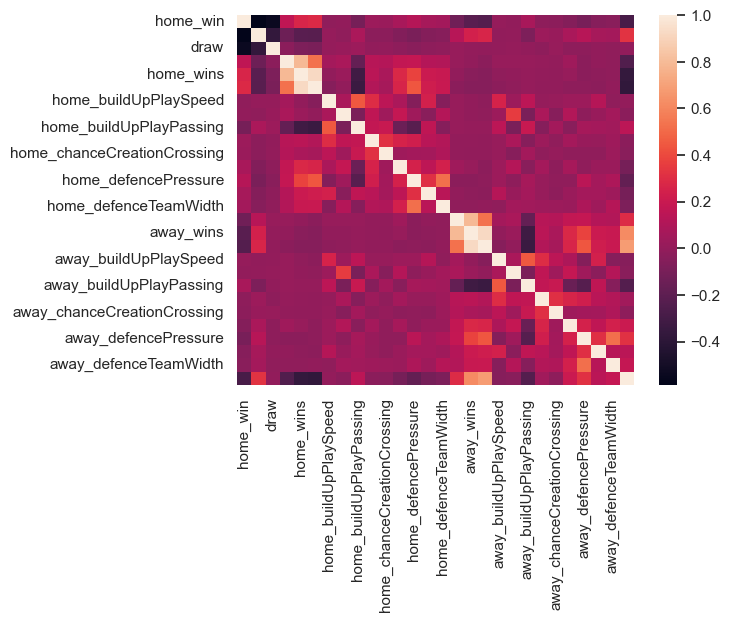

home_win                       1.000000
away_win                      -0.585596
draw                          -0.536806
home_matches_played            0.160997
home_wins                      0.266543
home_win_rate                  0.284290
home_buildUpPlaySpeed         -0.013603
home_buildUpPlayDribbling     -0.004366
home_buildUpPlayPassing       -0.103390
home_chanceCreationPassing     0.032499
home_chanceCreationCrossing    0.022454
home_chanceCreationShooting    0.073310
home_defencePressure           0.121274
home_defenceAggression         0.066272
home_defenceTeamWidth          0.052903
away_matches_played           -0.129157
away_wins                     -0.218815
away_win_rate                 -0.234770
away_buildUpPlaySpeed          0.003042
away_buildUpPlayDribbling     -0.007735
away_buildUpPlayPassing        0.075534
away_chanceCreationPassing    -0.015922
away_chanceCreationCrossing   -0.022818
away_chanceCreationShooting   -0.056768
away_defencePressure          -0.099972


In [28]:
# Heatmap 
corr = final_data.corr()
ax = sns.heatmap(corr)
plt.show()

print(corr['home_win'])

# DIMENSIONALITY REDUCTION 
# TODO:

In [29]:
# Import the necessary libraries
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


# Separate the target variable from the features
X = raw_data.drop(['home_win', 'away_win', 'draw'], axis=1)
y = raw_data['home_win']

col_headers = list(X.columns.values)

# Standardize the data
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

print(len(raw_data.columns))

28


In [30]:

# Instantiate a PCA object with the desired number of components
pca = PCA(n_components=5)

# Fit the PCA model to the data
pca.fit(X_std)

# Get the principal axes of the data
pca_axes = pca.components_

# Calculate the projections of each original variable on the principal axes
proj_data = X_std.dot(pca_axes.T)

# Convert the projected data back into a pandas dataframe with the original column headers
proj_df = pd.DataFrame(data=proj_data, columns=col_headers[:5])

# Print the resulting dataframe
print(proj_df)


# # Perform PCA
# pca = PCA(n_components=15)
# X_pca = pca.fit_transform(X_std)

# # View the explained variance ratio
# print(pca.explained_variance_ratio_)

# # View the transformed data
# print(X_pca)


       home_matches_played  home_wins  home_win_rate  home_buildUpPlaySpeed   
0                -0.365110   1.297626      -0.807015              -0.606576  \
1                -0.353537   1.297723      -0.805913              -0.603184   
2                -0.422176   1.297150      -0.812449              -0.623301   
3                -0.367904   1.297603      -0.807281              -0.607394   
4                -0.372692   1.297563      -0.807737              -0.608798   
...                    ...        ...            ...                    ...   
20770             2.872212  -0.798280       2.123135               1.976566   
20771             2.843216  -0.883547       0.925090               3.209052   
20772             2.594600  -0.885622       0.901415               3.136186   
20773             3.966352  -2.948057       3.504696               0.640333   
20774             2.396590  -0.614163       3.061397               0.900829   

       home_buildUpPlayDribbling  
0               

In this example, we first load the dataset and separate the target variable from the features. Then, we standardize the features using StandardScaler to ensure that all features have the same scale. We then perform PCA using the PCA class from scikit-learn and specify that we want to reduce the dimensionality to 2 principal components (i.e., n_components=2). We fit the PCA model to the standardized data and transform the data to obtain the principal components using fit_transform. Finally, we print the explained variance ratio to see how much of the variance in the data is explained by the principal components and print the transformed data.

Note that the number of principal components to retain depends on the desired level of information retention and the specific problem you are working on. In this example, we chose to retain 2 principal components for the sake of simplicity, but you can choose a different number based on your problem requirements.



